In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
Money_League_Df = pd.read_csv('..\\Consolidated Data\\Deloitte_Money_League Consildation.csv',usecols=['Country','Number of Teams'])
Money_League_Df.columns=['League','Deloitte_Club_Count']
Money_League_Df=Money_League_Df.replace(Money_League_Df.iloc[3]['League'],'Bundesliga') 

In [103]:
Top_Player_Df = pd.read_csv('..\\Consolidated Data\\Top 50 Players Consildation.csv')
Top_Player_Df.columns=['League','Top_Player_Count']
Top_Player_Df=Top_Player_Df.replace(Top_Player_Df.iloc[1]['League'],'English Premier League')
Top_Player_Df=Top_Player_Df.replace(Top_Player_Df.iloc[2]['League'],'La Liga')
Top_Player_Df=Top_Player_Df.replace(Top_Player_Df.iloc[3]['League'],'Serie A')

In [104]:
World_Cup_Df = pd.read_csv('..\\Consolidated Data\\World Cup Data Consolidation.csv')
World_Cup_Df.columns=['League','WC_Player_Count']
World_Cup_Df=World_Cup_Df.replace(World_Cup_Df.iloc[32]['League'],'English Premier League')
World_Cup_Df=World_Cup_Df.replace(World_Cup_Df.iloc[41]['League'],'Super Lig')

In [105]:
Champions_League_Df = pd.read_csv('..\\Consolidated Data\\Champions League Data Consildation.csv')
Champions_League_Df.columns=['League','CL_Range1_Win','CL_Range2_Win','CL_Range3_Win','CL_Range4_Win','CL_Range5_Win','CL_Range1_Runners','CL_Range2_Runners','CL_Range3_Runners','CL_Range4_Runners','CL_Range5_Runners','CL_Range1_SF1','CL_Range2_SF1','CL_Range3_SF1','CL_Range4_SF1','CL_Range5_SF1','CL_Range1_SF2','CL_Range2_SF2','CL_Range3_SF2','CL_Range4_SF2','CL_Range5_SF2']
Champions_League_Df=Champions_League_Df.replace(Champions_League_Df.iloc[18]['League'],'English Premier League')
Champions_League_Df=Champions_League_Df.replace(Champions_League_Df.iloc[28]['League'],'Super Lig')

In [106]:
Europa_League_Df = pd.read_csv('..\\Consolidated Data\\Europa League Data Consildation.csv')
Europa_League_Df.columns=['League','EL_Range1_Win','EL_Range2_Win','EL_Range3_Win','EL_Range4_Win','EL_Range5_Win','EL_Range1_Runners','EL_Range2_Runners','EL_Range3_Runners','EL_Range4_Runners','EL_Range5_Runners','EL_Range1_SF1','EL_Range2_SF1','EL_Range3_SF1','EL_Range4_SF1','EL_Range5_SF1','EL_Range1_SF2','EL_Range2_SF2','EL_Range3_SF2','EL_Range4_SF2','EL_Range5_SF2']
Europa_League_Df=Europa_League_Df.replace(Europa_League_Df.iloc[18]['League'],'English Premier League')
Europa_League_Df=Europa_League_Df.replace(Europa_League_Df.iloc[30]['League'],'Super Lig')

In [107]:
Combined_DF = pd.merge(Money_League_Df,Top_Player_Df,how='outer',on='League')

In [108]:
Combined_DF = pd.merge(Combined_DF,World_Cup_Df,how='outer',on='League')

In [109]:
Combined_DF = pd.merge(Combined_DF,Europa_League_Df,how='outer',on='League')

In [110]:
Combined_DF = pd.merge(Combined_DF,Champions_League_Df,how='outer',on='League')

In [111]:
Combined_DF = Combined_DF.dropna(how='all')

In [112]:
Combined_DF = Combined_DF.fillna(0)

In [113]:
Combined_DF[Combined_DF['League'] == 'Primeira Liga']

,League,Deloitte_Club_Count,Top_Player_Count,WC_Player_Count,EL_Range1_Win,EL_Range2_Win,EL_Range3_Win,EL_Range4_Win,EL_Range5_Win,EL_Range1_Runners,...,CL_Range1_SF1,CL_Range2_SF1,CL_Range3_SF1,CL_Range4_SF1,CL_Range5_SF1,CL_Range1_SF2,CL_Range2_SF2,CL_Range3_SF2,CL_Range4_SF2,CL_Range5_SF2
7,Primeira Liga,1.0,0.0,11.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
df_temp = Combined_DF.set_index(keys='League')

In [126]:
df_temp = df_temp.drop(['2. Bundesliga','A-League','Argentine Primera División','Campeonato Brasileiro Série A','Categoría Primera A','Chinese Super League','EFL League One','Egyptian Premier League','Ekstraklasa','Israeli Premier League','J1 League'],axis=0)
df_temp = df_temp.drop(['J2 League','K League 1','Liga FPD','Liga I','Liga MX','Ligue 2','Ligue1, LP1','Major League Soccer','Nigerian Professional Football League','Persian Gulf Pro League'],axis=0)
df_temp = df_temp.drop(['Segunda División','Úrvalsdeild karla (football)','Championnat National 2','Regionalliga Nordost','Ukrainian Amateur Football Championship','Fortuna liga','Nemzeti Bajnokság II'],axis=0)

In [128]:
df_un_norm = df_temp[['Deloitte_Club_Count','Top_Player_Count','WC_Player_Count']]

In [129]:
df_un_norm.head(2)

,Deloitte_Club_Count,Top_Player_Count,WC_Player_Count
League,,,
English Premier League,13.0,13.0,92.0
Serie A,5.0,4.0,40.0


In [130]:
df_un_norm=((df_un_norm-df_un_norm.min())/(df_un_norm.max()-df_un_norm.min()))*3

In [134]:
df_temp = df_temp.drop(['Deloitte_Club_Count','Top_Player_Count','WC_Player_Count'],axis=1)

In [137]:
df_un_norm = df_un_norm.reset_index()

In [139]:
df_temp = df_temp.reset_index()

In [140]:
df_temp2 = pd.merge(df_un_norm,df_temp,how='inner',on='League')

In [144]:
df_temp = df_temp2.set_index('League')

### Apply weightage

In [154]:
df_temp['Deloitte_Club_Count'] = df_temp['Deloitte_Club_Count'] * 0.8

In [156]:
df_temp['WC_Player_Count'] = df_temp['WC_Player_Count'] * 0.6

In [159]:
df_temp['EL_Range1_Win'] = df_temp['EL_Range1_Win'] * 0.5
df_temp['EL_Range2_Win'] = df_temp['EL_Range2_Win'] * 0.5
df_temp['EL_Range3_Win'] = df_temp['EL_Range3_Win'] * 0.5
df_temp['EL_Range4_Win'] = df_temp['EL_Range4_Win'] * 0.5
df_temp['EL_Range5_Win'] = df_temp['EL_Range5_Win'] * 0.5

In [165]:
df_temp.columns

Index(['Deloitte_Club_Count', 'Top_Player_Count', 'WC_Player_Count',
       'EL_Range1_Win', 'EL_Range2_Win', 'EL_Range3_Win', 'EL_Range4_Win',
       'EL_Range5_Win', 'EL_Range1_Runners', 'EL_Range2_Runners',
       'EL_Range3_Runners', 'EL_Range4_Runners', 'EL_Range5_Runners',
       'EL_Range1_SF1', 'EL_Range2_SF1', 'EL_Range3_SF1', 'EL_Range4_SF1',
       'EL_Range5_SF1', 'EL_Range1_SF2', 'EL_Range2_SF2', 'EL_Range3_SF2',
       'EL_Range4_SF2', 'EL_Range5_SF2', 'CL_Range1_Win', 'CL_Range2_Win',
       'CL_Range3_Win', 'CL_Range4_Win', 'CL_Range5_Win', 'CL_Range1_Runners',
       'CL_Range2_Runners', 'CL_Range3_Runners', 'CL_Range4_Runners',
       'CL_Range5_Runners', 'CL_Range1_SF1', 'CL_Range2_SF1', 'CL_Range3_SF1',
       'CL_Range4_SF1', 'CL_Range5_SF1', 'CL_Range1_SF2', 'CL_Range2_SF2',
       'CL_Range3_SF2', 'CL_Range4_SF2', 'CL_Range5_SF2'],
      dtype='object')

In [157]:
df_temp.head(3)

,Deloitte_Club_Count,Top_Player_Count,WC_Player_Count,EL_Range1_Win,EL_Range2_Win,EL_Range3_Win,EL_Range4_Win,EL_Range5_Win,EL_Range1_Runners,EL_Range2_Runners,...,CL_Range1_SF1,CL_Range2_SF1,CL_Range3_SF1,CL_Range4_SF1,CL_Range5_SF1,CL_Range1_SF2,CL_Range2_SF2,CL_Range3_SF2,CL_Range4_SF2,CL_Range5_SF2
League,,,,,,,,,,,,,,,,,,,,,
English Premier League,2.400000,3.000000,1.800000,2.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,2.0,1.0
Serie A,0.923077,0.923077,0.782609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
La Liga,0.738462,3.000000,0.860870,1.0,3.0,1.0,1.0,2.0,0.0,0.0,...,2.0,1.0,3.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0


### Hierarchial Clustering

In [146]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(df_temp.values, 'ward')
Z2 = linkage(df_temp.values, 'centroid')

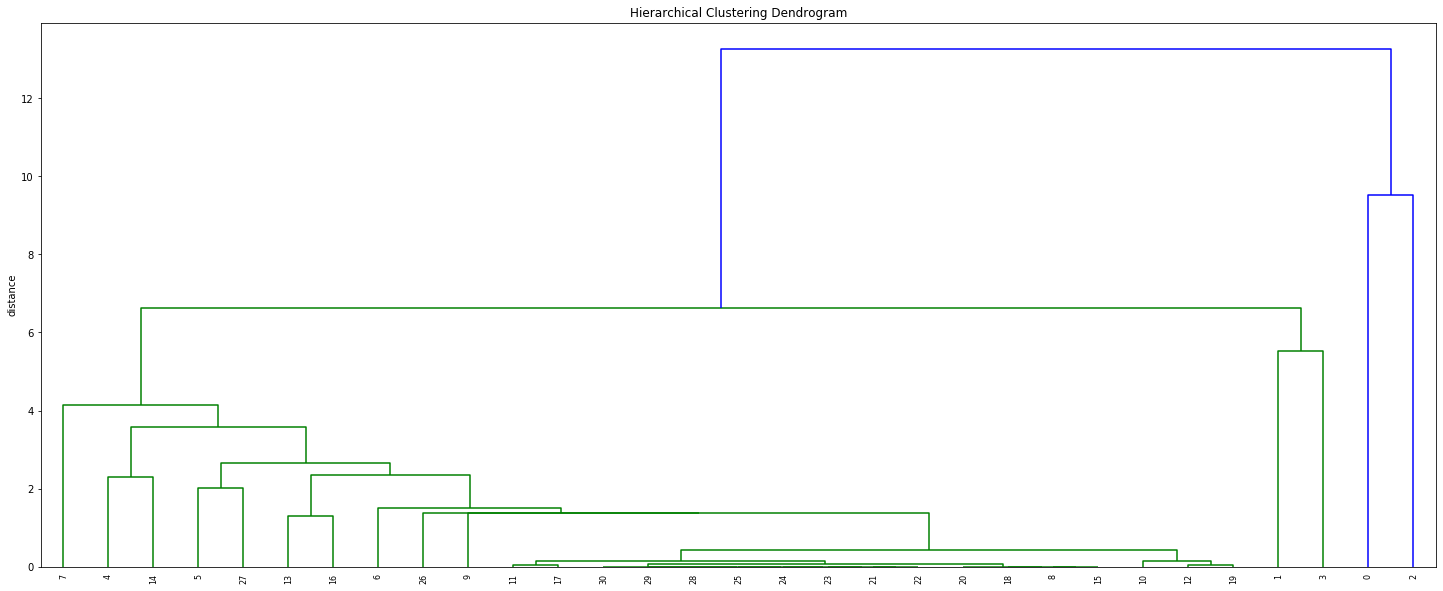

In [147]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### Remove The first cluster and run the clustering again

In [148]:
df_temp_run2 = df_temp.drop(['English Premier League','La Liga'],axis=0)

In [149]:
df_temp_run2.head(5)

,Deloitte_Club_Count,Top_Player_Count,WC_Player_Count,EL_Range1_Win,EL_Range2_Win,EL_Range3_Win,EL_Range4_Win,EL_Range5_Win,EL_Range1_Runners,EL_Range2_Runners,...,CL_Range1_SF1,CL_Range2_SF1,CL_Range3_SF1,CL_Range4_SF1,CL_Range5_SF1,CL_Range1_SF2,CL_Range2_SF2,CL_Range3_SF2,CL_Range4_SF2,CL_Range5_SF2
League,,,,,,,,,,,,,,,,,,,,,
Serie A,1.153846,0.923077,1.304348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
Bundesliga,0.692308,0.461538,1.336957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Ligue 1,0.461538,0.000000,1.304348,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Russian Premier League,0.230769,0.000000,0.978261,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Super Lig,0.230769,0.000000,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


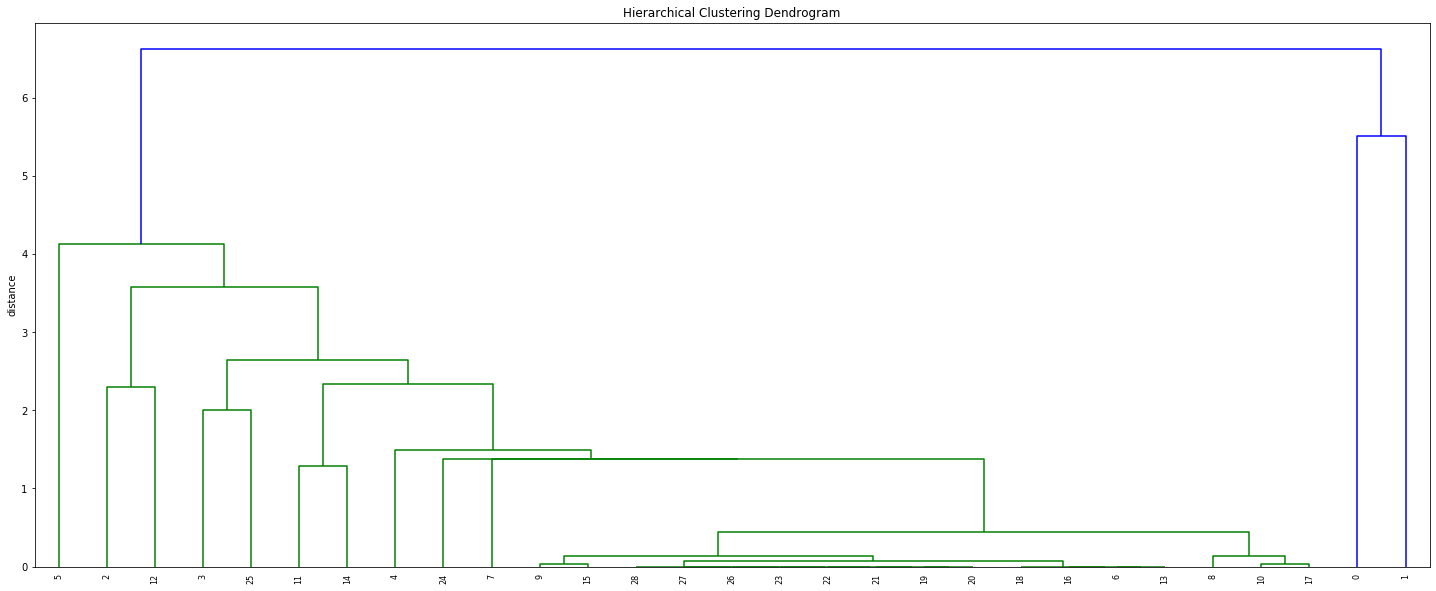

In [150]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(df_temp_run2.values, 'ward')
Z2 = linkage(df_temp_run2.values, 'centroid')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [151]:
df_temp_run3 = df_temp_run2.drop(['Serie A','Bundesliga'],axis=0)

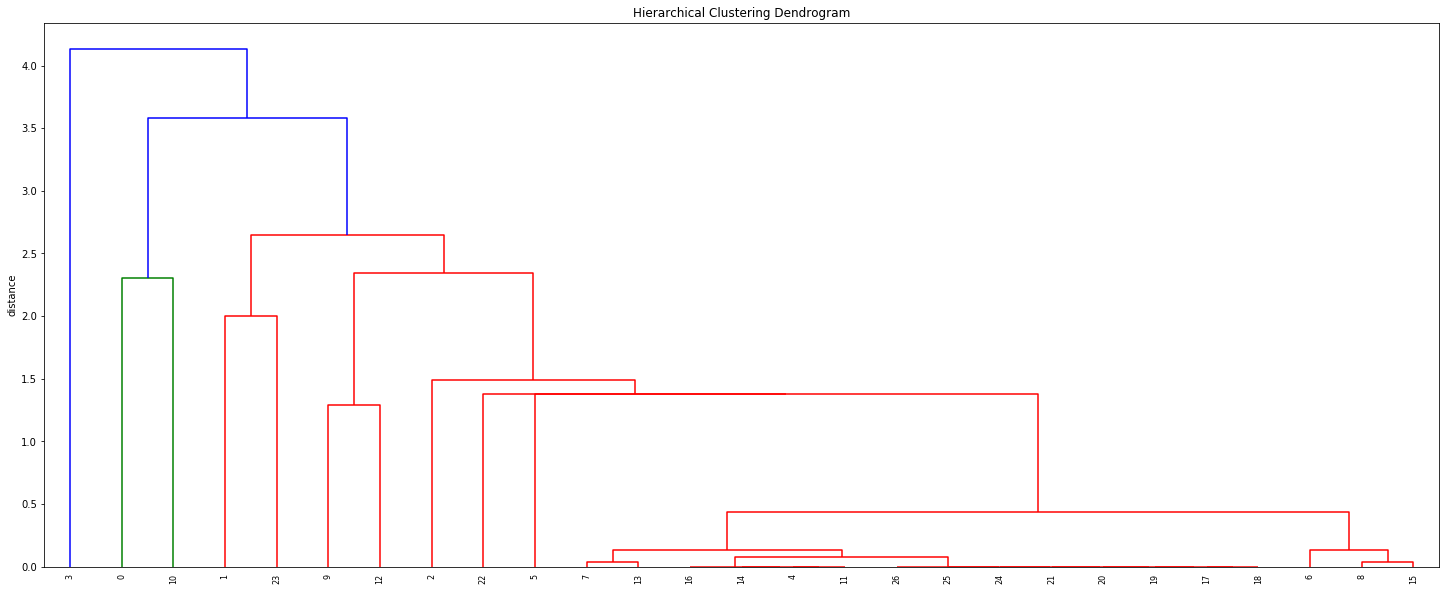

In [152]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(df_temp_run3.values, 'ward')
Z2 = linkage(df_temp_run3.values, 'centroid')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [153]:
df_temp_run3.head()

,Deloitte_Club_Count,Top_Player_Count,WC_Player_Count,EL_Range1_Win,EL_Range2_Win,EL_Range3_Win,EL_Range4_Win,EL_Range5_Win,EL_Range1_Runners,EL_Range2_Runners,...,CL_Range1_SF1,CL_Range2_SF1,CL_Range3_SF1,CL_Range4_SF1,CL_Range5_SF1,CL_Range1_SF2,CL_Range2_SF2,CL_Range3_SF2,CL_Range4_SF2,CL_Range5_SF2
League,,,,,,,,,,,,,,,,,,,,,
Ligue 1,0.461538,0.0,1.304348,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Russian Premier League,0.230769,0.0,0.978261,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Super Lig,0.230769,0.0,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Primeira Liga,0.230769,0.0,0.358696,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Allsvenskan,0.000000,0.0,0.032609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
